In [33]:
import main
import numpy as np
import matplotlib.pyplot as plt 
np.set_printoptions(precision=2)

### Question One
Solve the second-order ODE

$\frac{d^2y}{dx^2}=a\exp\left[-k(x-x_0)^2\right]$

between $x\subset\left[-2,2\right]$ given that $y_L(-2)=y_R(2)=9$.

Let $\begin{align}\frac{d^2y}{dx^2}&=y''(x,y')=p(x)y'+q(x)y+r(x)\\
&=6\exp\left[-8(x+1.428571)^2\right]\end{align}$

In [34]:
yL = 9 #left-boundary
yR = 9 #right-boundary
a = 6
k = 8
x0 = -1.428571
xL = -2
xR = 2

We divide x into evenly spaced mesh points $0\leq i\leq (n-1)$.

$x_i=x_0+ih\textrm{, }h=\frac{\left(x_{min}-x_{max}\right)}{(n-1)}$


In [35]:
N=500
x = np.linspace(xL, xR, N)
x

array([-2.  , -1.99, -1.98, -1.98, -1.97, -1.96, -1.95, -1.94, -1.94,
       -1.93, -1.92, -1.91, -1.9 , -1.9 , -1.89, -1.88, -1.87, -1.86,
       -1.86, -1.85, -1.84, -1.83, -1.82, -1.82, -1.81, -1.8 , -1.79,
       -1.78, -1.78, -1.77, -1.76, -1.75, -1.74, -1.74, -1.73, -1.72,
       -1.71, -1.7 , -1.7 , -1.69, -1.68, -1.67, -1.66, -1.66, -1.65,
       -1.64, -1.63, -1.62, -1.62, -1.61, -1.6 , -1.59, -1.58, -1.58,
       -1.57, -1.56, -1.55, -1.54, -1.54, -1.53, -1.52, -1.51, -1.5 ,
       -1.49, -1.49, -1.48, -1.47, -1.46, -1.45, -1.45, -1.44, -1.43,
       -1.42, -1.41, -1.41, -1.4 , -1.39, -1.38, -1.37, -1.37, -1.36,
       -1.35, -1.34, -1.33, -1.33, -1.32, -1.31, -1.3 , -1.29, -1.29,
       -1.28, -1.27, -1.26, -1.25, -1.25, -1.24, -1.23, -1.22, -1.21,
       -1.21, -1.2 , -1.19, -1.18, -1.17, -1.17, -1.16, -1.15, -1.14,
       -1.13, -1.13, -1.12, -1.11, -1.1 , -1.09, -1.09, -1.08, -1.07,
       -1.06, -1.05, -1.05, -1.04, -1.03, -1.02, -1.01, -1.01, -1.  ,
       -0.99, -0.98,

We now determine values for $dx$ and $dx^2$ by evaluating the expression...

$\begin{align}dx &= x_i-x_{i+1}\\
&=x_0-x_0+ih-(i+1)h\\
&=-h\textrm{, }-h=\frac{\left(x_{max}-x_{min}\right)}{(n-1)}\end{align}$

Choosing the finite difference operator $\Delta$ avoids confusion about how to calculate $dx^2$
$\begin{align}\Delta x^2&\equiv (dx)^2\\\Delta x^2&\neq x_i^2-x_{i+1}^2
\end{align}$
Making our expression far simpler to evaluate.


In [36]:
Dx = (xR-xL)/(N-1)
DDx = Dx**2
print('Δx =',Dx,'\nΔx²=',DDx)

Δx = 0.008016032064128256 
Δx²= 6.42567700531323e-05


Now, we let $\frac{d^2y}{dx^2}=g(x)$

$\begin{align}
\frac{d^2y}{dx^2}\Rightarrow g(x)=a\exp\left[-k(x-x_0)^2\right]
\end{align}$

To solve, we need to evaluate the boundary conditions $y_L(x=-2)=9\textrm{ and, }y_R(x=2)=9$, hence:

$\begin{align}
g(x_0)&=-2y_L\\
g(x_{N-1})&=-2y_R
\end{align}$

In [37]:
def g(x,N):
    gx = np.zeros(N)
    for i in range(0,N):
        gx[i] = (a * (np.exp(-k * (x[i] - x0)**2))) * DDx
    gx[0] = yL*(-2)
    gx[N-1] = yR * (-2)
    return gx

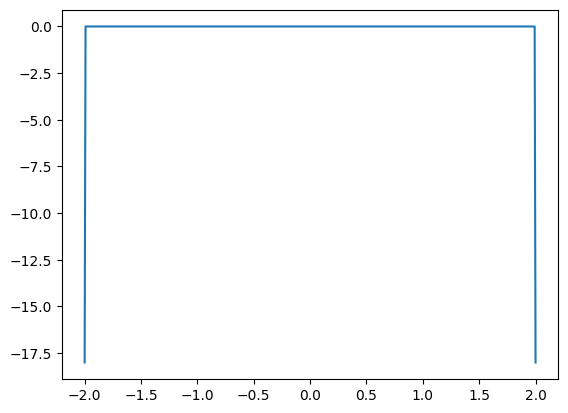

In [38]:
plt.plot(x, g(x,N))